# Photon Cut-based Fall17V2 ID variable study

In [ ]:
import awkward1 as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
 def flat_dim(arr):
        sub_arr = ak.flatten(arr)
        mask = ~ak.is_none(sub_arr)
        return ak.to_numpy(sub_arr[mask])

In [4]:
infile = 'data/59AB328B-F0E3-F544-98BB-E5E55577C649_skim_2ElIdPt20.root'

In [5]:
events = NanoEventsFactory.from_root(infile, schemaclass=NanoAODSchema).events()

In [6]:
Electron = events.Electron
Photon   = events.Photon

### Cut based ID Fall17V2   
  - Link:https://twiki.cern.ch/twiki/bin/view/CMS/CutBasedPhotonIdentificationRun2

Text(0.5, 1.0, 'VutBased ID Fall17V2')

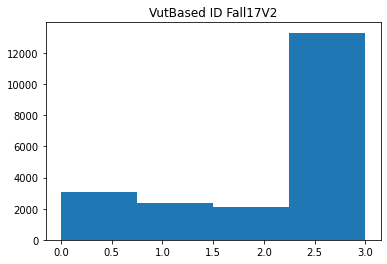

In [7]:
plt.hist(flat_dim(Photon.cutBased),bins=4)
plt.title('VutBased ID Fall17V2')

In [20]:
def Particle_selection(ele,pho):
    # Electron selection
    # 0 Fail 1 Loose 2 Medium 3 Tight
    EleSelmask = (ele.pt > 25) & (np.abs(ele.eta) < 2.5) & (ele.cutBased > 1)

    # Photon selection
    # 0 Fail 1 Loose 2 Medium 3 Tight
    # -- HoE cut is added manually
    #PhoSelmaskEE = (pho.pt > 25) & (pho.cutBased > 1) &  pho.isScEtaEE & (pho.hoe < 0.0326)
    #PhoSelmaskEB = (pho.pt > 25) & (pho.cutBased > 1) &  pho.isScEtaEB & (pho.hoe < 0.02197)
    #PhoSelmask = PhoSelmaskEE | PhoSelmaskEB
    
    # -- Original Photon selection
    PhoSelmask = (pho.pt > 25) & (pho.cutBased > 1)
    return EleSelmask,PhoSelmask

In [21]:
# Event Selection
Electron_mask, Photon_mask  = Particle_selection(Electron,Photon)
Ele_channel_mask = ak.num(Electron[Electron_mask]) > 1
Pho_channel_mask = ak.num(Photon[Photon_mask]) > 0

In [22]:
Ele_channel_events = events[Ele_channel_mask & Pho_channel_mask]

In [23]:
Ele = Ele_channel_events.Electron
Pho = Ele_channel_events.Photon

In [24]:
Electron_mask,Photon_mask = Particle_selection(Ele,Pho)
Ele_sel = Ele[Electron_mask]
Pho_sel = Pho[Photon_mask]

# Helper function: High PT argmax
def make_leading_pair(target,base):

    return target[ak.argmax(base.pt,axis=1,keepdims=True)]

leading_pho = make_leading_pair(Pho_sel,Pho_sel)

In [25]:
print( len(leading_pho) / len(events) * 100 )

77.99599198396794


In [26]:
# Photon
isEE_mask = leading_pho.isScEtaEE
isEB_mask = leading_pho.isScEtaEB

In [27]:
## EndCap Photon
EE_Pho = leading_pho[isEE_mask]

## Barrel Photon
EB_Pho = leading_pho[isEB_mask]

### HoverE (Not matched)  
 - EB: 0.02197
 - EE: 0.0326 

In [28]:
print("EE max:{0} min:{1}".format(ak.max(flat_dim(EE_Pho.hoe)),ak.min(flat_dim(EE_Pho.hoe))))
print("EB max:{0} min:{1}".format(ak.max(flat_dim(EB_Pho.hoe)),ak.min(flat_dim(EB_Pho.hoe))))

EE max:0.13037109375 min:0.0
EB max:0.106689453125 min:0.0


Text(0.5, 1.0, 'EB HoverE')

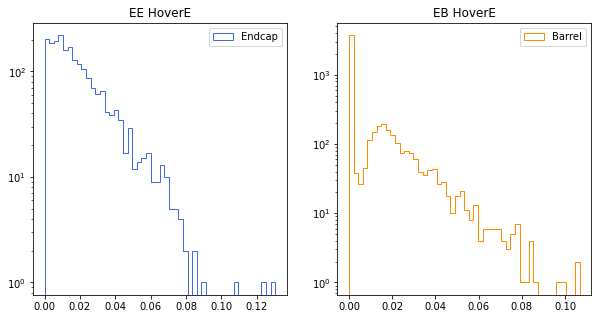

In [29]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].hist(flat_dim(EE_Pho.hoe),bins=50,color='royalblue',histtype='step',label='Endcap')
axs[0].set_yscale('log')
axs[0].legend()
axs[0].set_title('EE HoverE')

axs[1].hist(flat_dim(EB_Pho.hoe),bins=50,color='darkorange',histtype='step',label='Barrel')
axs[1].set_yscale('log')
axs[1].legend()
axs[1].set_title('EB HoverE')

### sigma ietaieta  
 - EB: 0.01015
 - EE: 0.0272

In [30]:
print("EE max:{0} min:{1}".format(ak.max(flat_dim(EE_Pho.sieie)),ak.min(flat_dim(EE_Pho.sieie))))
print("EB max:{0} min:{1}".format(ak.max(flat_dim(EB_Pho.sieie)),ak.min(flat_dim(EB_Pho.sieie))))

EE max:0.027191162109375 min:0.01555633544921875
EB max:0.01013946533203125 min:0.0024929046630859375


Text(0.5, 1.0, 'EE sieie')

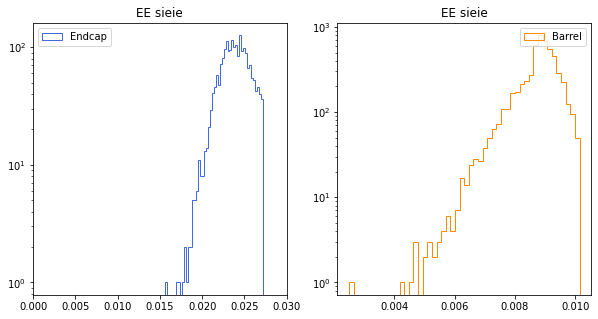

In [31]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].hist(flat_dim(EE_Pho.sieie),bins=50,color='royalblue',histtype='step',label='Endcap')
axs[0].set_yscale('log')
axs[0].legend()
axs[0].set_title('EE sieie')
axs[0].set_xlim(0,0.03)

axs[1].hist(flat_dim(EB_Pho.sieie),bins=50,color='darkorange',histtype='step',label='Barrel')
axs[1].set_yscale('log')
axs[1].legend()
axs[1].set_title('EE sieie')

### Charged hadron isolation  
 - EB: 1.141
 - EE: 1.051

In [33]:
print("EE max:{0} min:{1}".format(ak.max(flat_dim(EE_Pho.pfRelIso03_chg)),ak.min(flat_dim(EE_Pho.pfRelIso03_chg))))
print("EB max:{0} min:{1}".format(ak.max(flat_dim(EB_Pho.pfRelIso03_chg)),ak.min(flat_dim(EB_Pho.pfRelIso03_chg))))

EE max:0.038137324154376984 min:0.0
EB max:0.04000825807452202 min:0.0


Text(0.5, 1.0, 'EE Charged hadron iso')

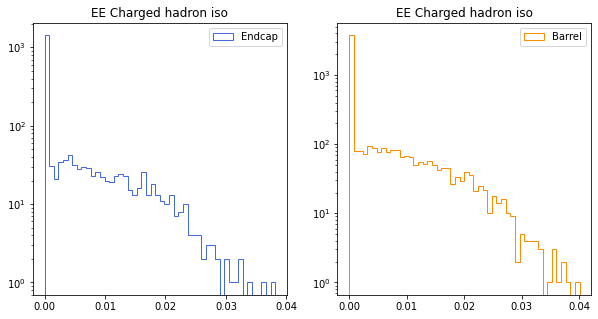

In [39]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].hist(flat_dim(EE_Pho.pfRelIso03_chg),bins=50,color='royalblue',histtype='step',label='Endcap')
axs[0].set_yscale('log')
axs[0].legend()
axs[0].set_title('EE Charged hadron iso')
#axs[0].set_xlim(0,0.1)

axs[1].hist(flat_dim(EB_Pho.pfRelIso03_chg),bins=50,color='darkorange',histtype='step',label='Barrel')
axs[1].set_yscale('log')
axs[1].legend()
axs[1].set_title('EE Charged hadron iso')